# Análisis Inicial del Dataset y Preparación

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Cargar datos
df = pd.read_csv('../data/teleCust1000t.csv')

# Información básica
print("Dimensiones del dataset:", df.shape)
print("\nInformación de columnas:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

Dimensiones del dataset: (1000, 12)

Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None

Estadísticas descriptivas:
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   

# Análisis de Valores Faltantes y Duplicados

In [2]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Verificar duplicados
duplicates = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicates}")

Valores faltantes por columna:
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

Registros duplicados: 0


# 3 Análisis de la Variable Objetivo (custcat)


Porcentaje por categoría:
custcat
3    28.1
1    26.6
4    23.6
2    21.7
Name: proportion, dtype: float64


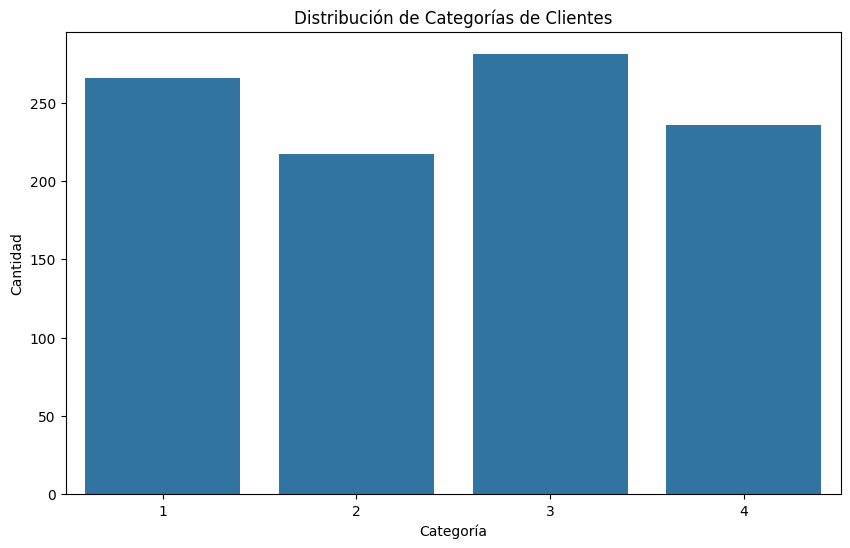

In [3]:
# Distribución de clases
plt.figure(figsize=(10, 6))
class_dist = df['custcat'].value_counts()
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Distribución de Categorías de Clientes')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Calcular desbalanceo
print("\nPorcentaje por categoría:")
print((df['custcat'].value_counts(normalize=True) * 100).round(2))

# 4 Análisis de Variables Numéricas

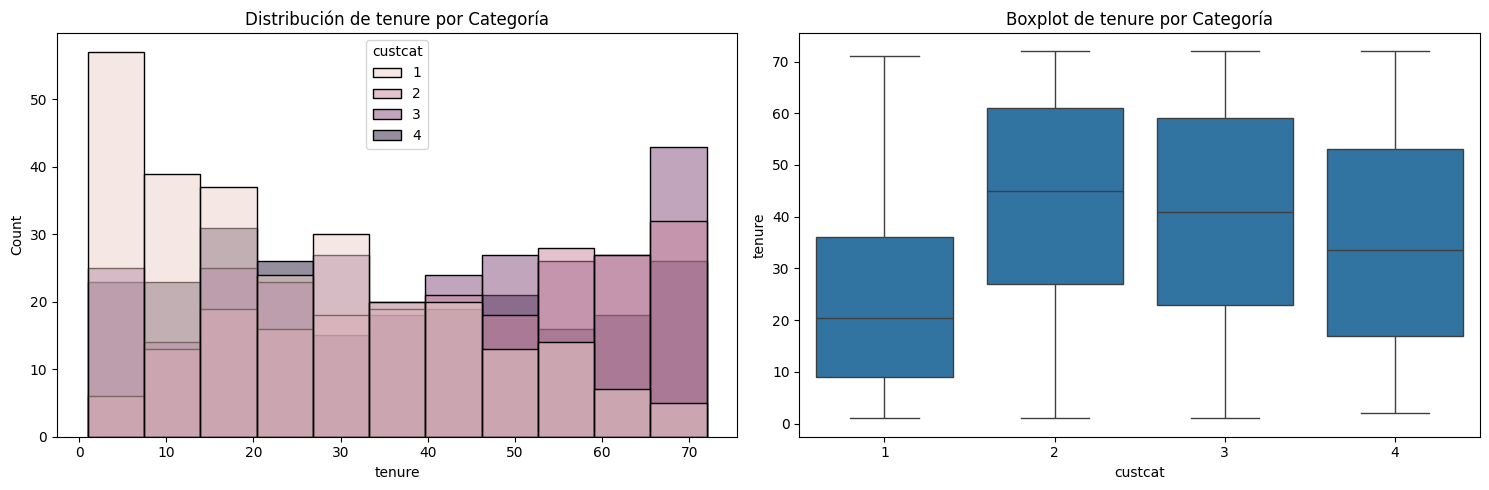

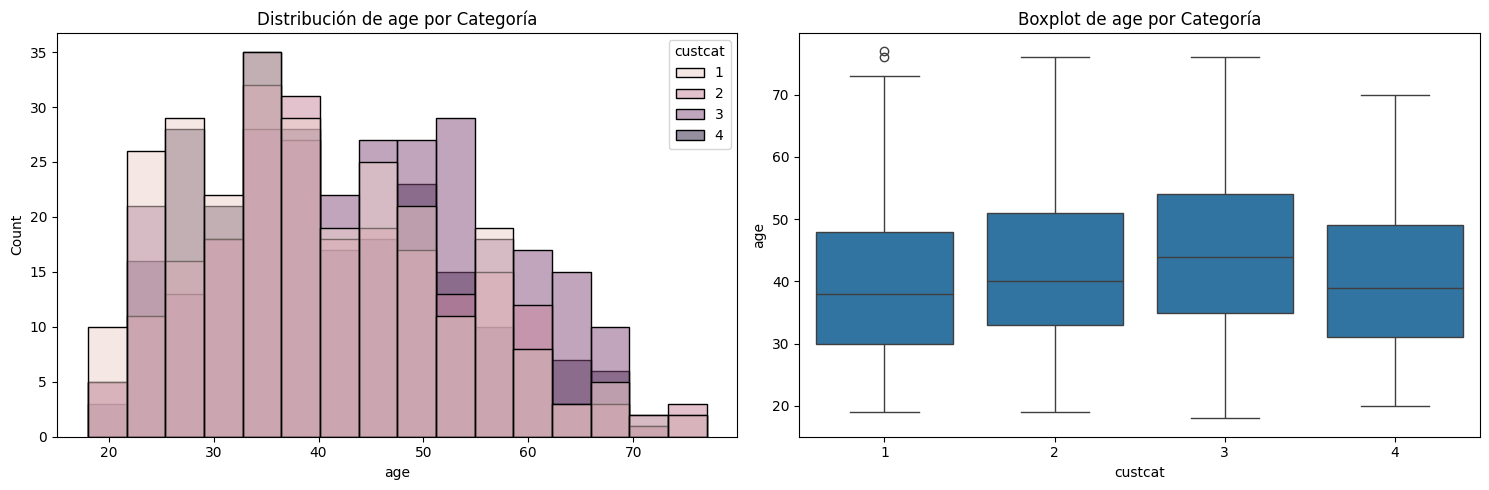

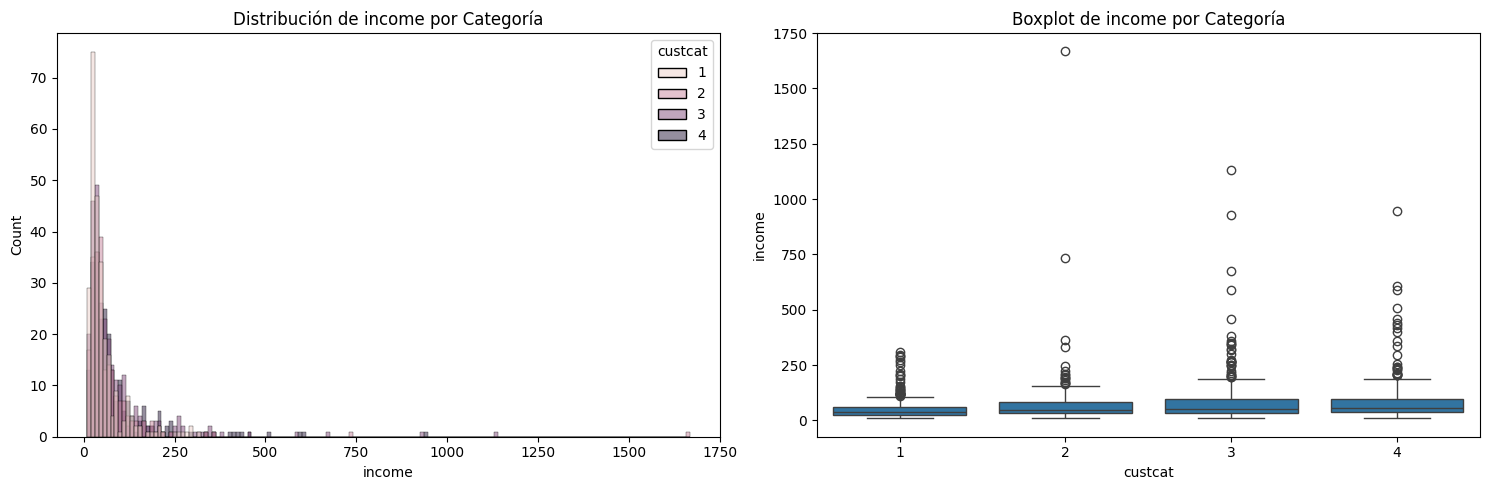

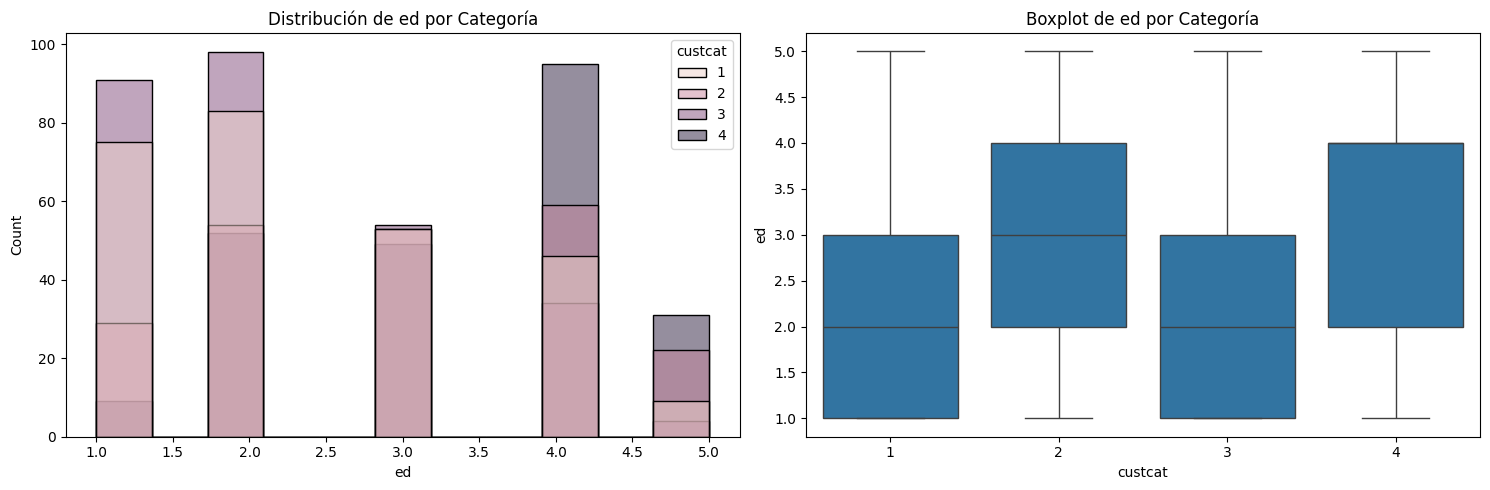

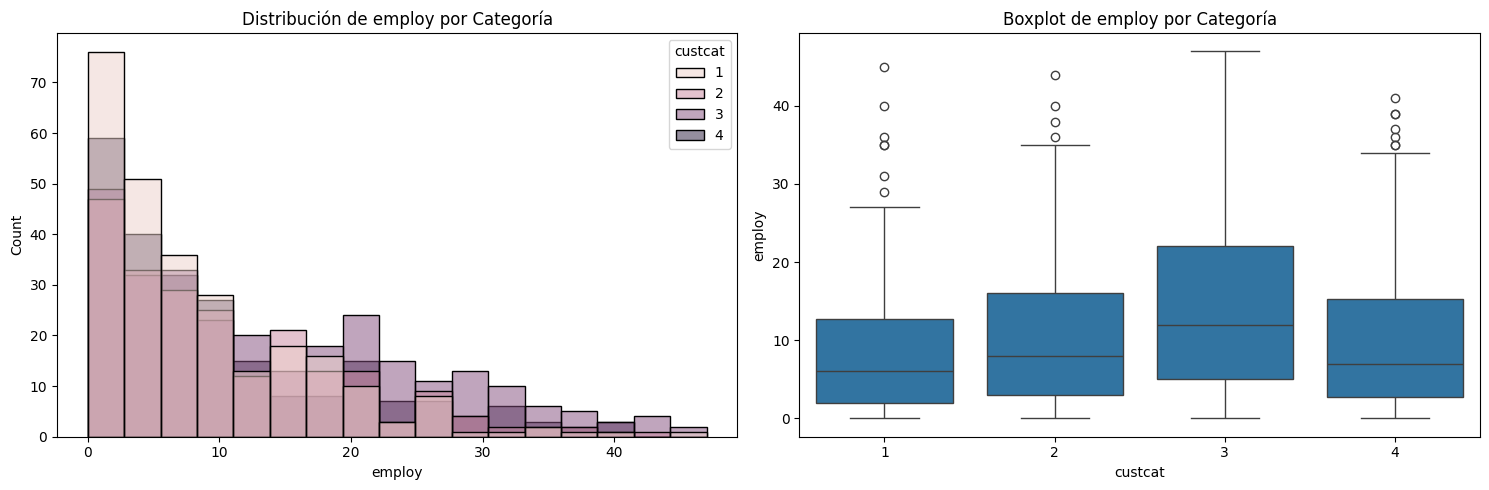

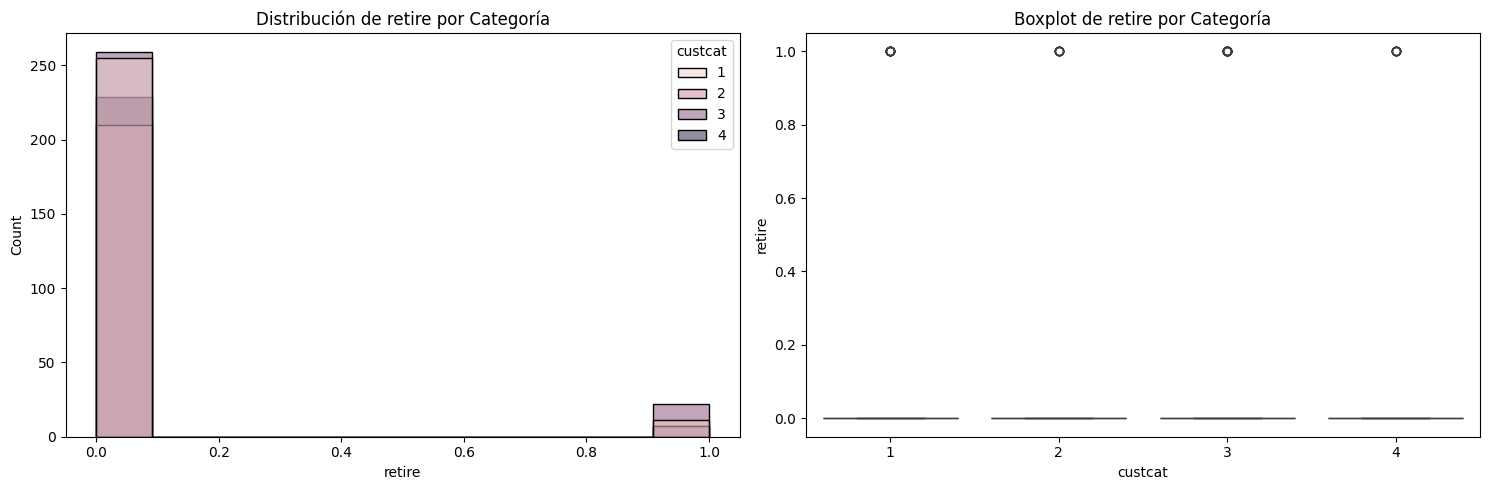

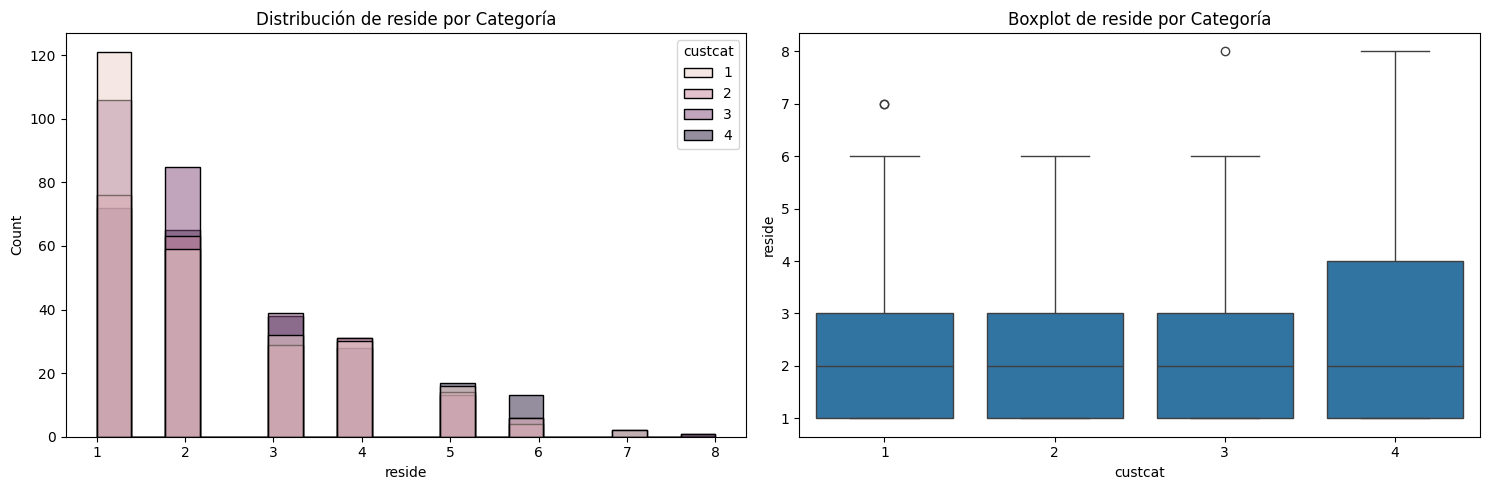

In [4]:
# Lista de variables numéricas
numeric_cols = ['tenure', 'age', 'income', 'ed', 'employ', 'retire', 'reside']

# Crear histogramas y boxplots
for col in numeric_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Histograma
    sns.histplot(data=df, x=col, hue='custcat', ax=ax1)
    ax1.set_title(f'Distribución de {col} por Categoría')

    # Boxplot
    sns.boxplot(data=df, y=col, x='custcat', ax=ax2)
    ax2.set_title(f'Boxplot de {col} por Categoría')

    plt.tight_layout()

# 5 Análisis de Variables Categóricas

<Figure size 1000x600 with 0 Axes>

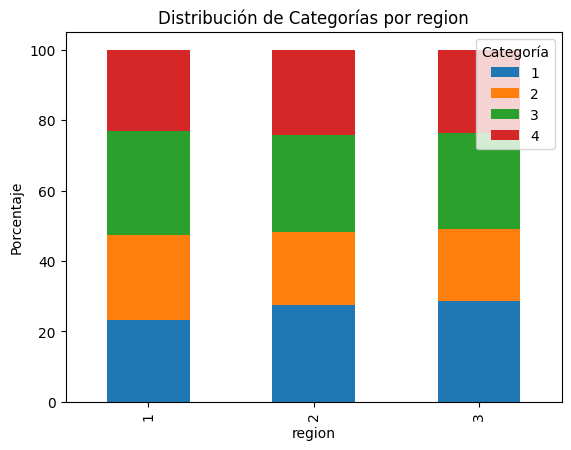

<Figure size 1000x600 with 0 Axes>

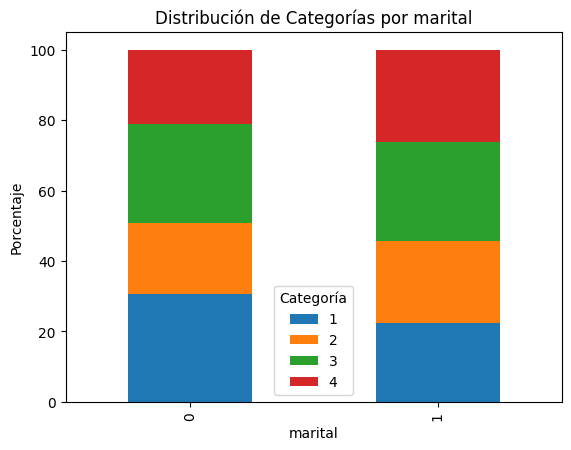

<Figure size 1000x600 with 0 Axes>

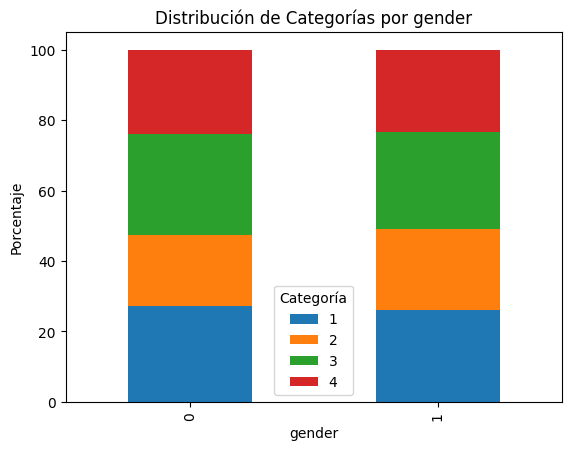

In [5]:
# Variables categóricas
cat_cols = ['region', 'marital', 'gender']

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    crosstab = pd.crosstab(df[col], df['custcat'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Distribución de Categorías por {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentaje')
    plt.legend(title='Categoría')

# 6 Análisis de Correlaciones

Text(0.5, 1.0, 'Matriz de Correlación')

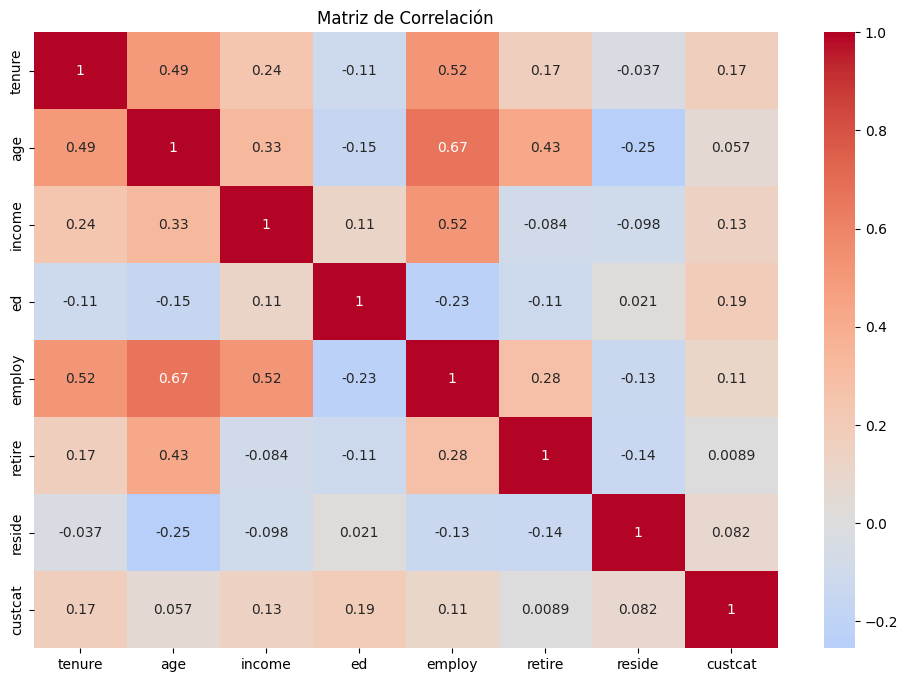

In [6]:
# Matriz de correlación para variables numéricas
corr_matrix = df[numeric_cols + ['custcat']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

# 7 Análisis de Outliers

In [7]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

# Detectar outliers en variables numéricas
for col in numeric_cols:
    n_outliers = detect_outliers(df, col)
    print(f"Outliers en {col}: {n_outliers}")

Outliers en tenure: 0
Outliers en age: 0
Outliers en income: 93
Outliers en ed: 0
Outliers en employ: 16
Outliers en retire: 47
Outliers en reside: 6


# 8 Análisis Estadístico

In [8]:
# Test de normalidad para variables numéricas
for col in numeric_cols:
    stat, p_value = stats.normaltest(df[col])
    print(f"\nTest de normalidad para {col}:")
    print(f"p-value: {p_value}")

# ANOVA para variables numéricas respecto a la clase
for col in numeric_cols:
    groups = [group for _, group in df.groupby('custcat')[col]]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\nANOVA para {col}:")
    print(f"p-value: {p_value}")


Test de normalidad para tenure:
p-value: 4.821850026996287e-204

Test de normalidad para age:
p-value: 4.218428873352217e-12

Test de normalidad para income:
p-value: 2.7388500059706293e-278

Test de normalidad para ed:
p-value: 5.122369412879244e-66

Test de normalidad para employ:
p-value: 4.717514073345994e-31

Test de normalidad para retire:
p-value: 1.2170133489370953e-190

Test de normalidad para reside:
p-value: 2.4632176971989817e-29

ANOVA para tenure:
p-value: 3.6551691072303725e-25

ANOVA para age:
p-value: 5.585814780810371e-05

ANOVA para income:
p-value: 0.00017986258909174615

ANOVA para ed:
p-value: 1.8619499710001118e-36

ANOVA para employ:
p-value: 9.288251554937859e-11

ANOVA para retire:
p-value: 0.029582741328674826

ANOVA para reside:
p-value: 0.00786180018205632


# 9 Feature Engineering Preliminar

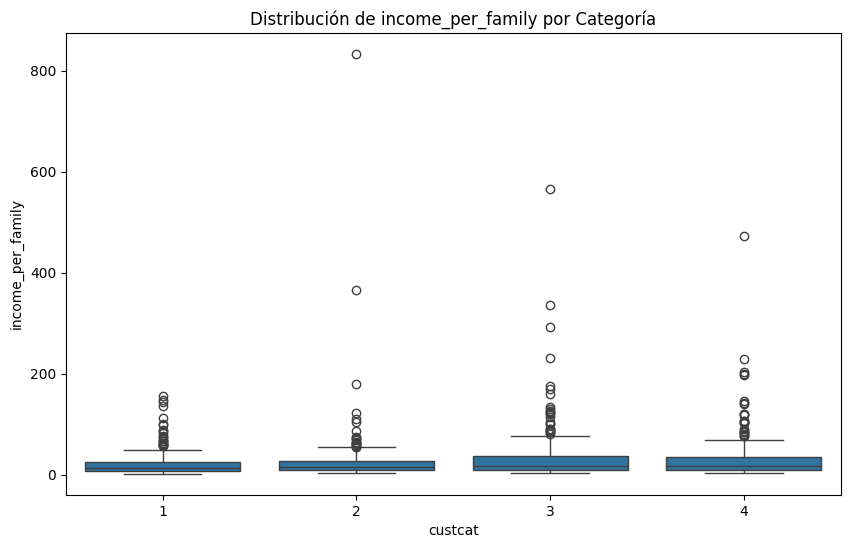

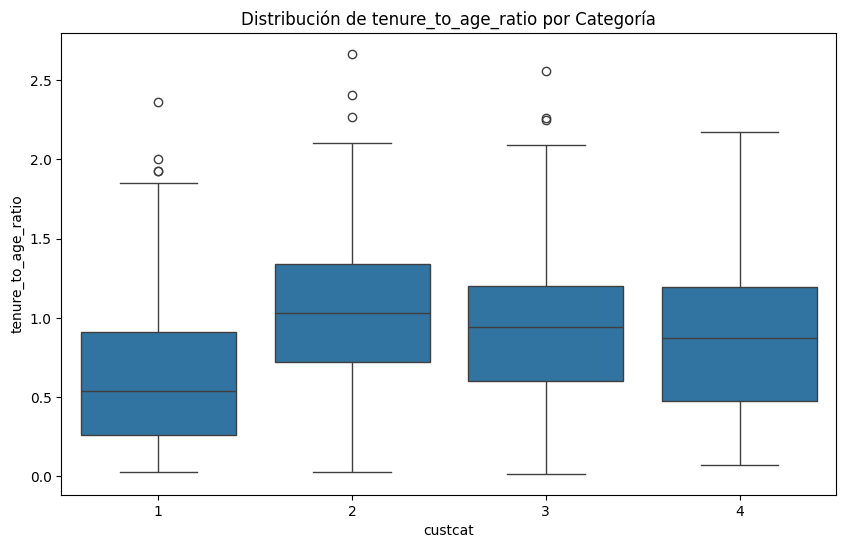

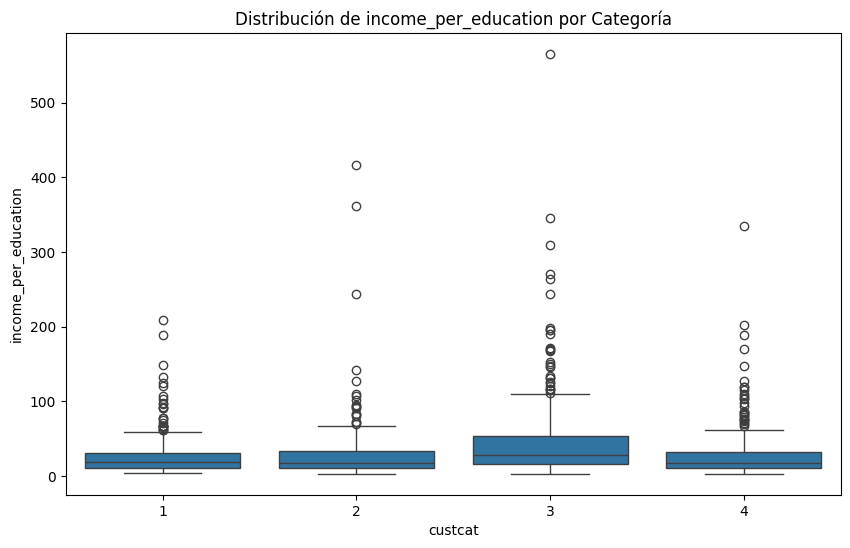

In [12]:
# Crear ratios y características derivadas
df['income_per_family'] = df['income'] / (df['reside'] + 1)
df['tenure_to_age_ratio'] = df['tenure'] / df['age']
df['income_per_education'] = df['income'] / df['ed']

# Analizar las nuevas características
for col in ['income_per_family', 'tenure_to_age_ratio', 'income_per_education']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='custcat', y=col)
    plt.title(f'Distribución de {col} por Categoría')

# 10 Resultado del análisis básico

In [13]:
# Dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Información básica de las columnas
print(df.info())

# Distribución de la variable objetivo (custcat)
print(df['custcat'].value_counts(normalize=True) * 100)

Dimensiones del dataset: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                1000 non-null   int64  
 1   tenure                1000 non-null   int64  
 2   age                   1000 non-null   int64  
 3   marital               1000 non-null   int64  
 4   address               1000 non-null   int64  
 5   income                1000 non-null   float64
 6   ed                    1000 non-null   int64  
 7   employ                1000 non-null   int64  
 8   retire                1000 non-null   float64
 9   gender                1000 non-null   int64  
 10  reside                1000 non-null   int64  
 11  custcat               1000 non-null   int64  
 12  income_per_family     1000 non-null   float64
 13  tenure_to_age_ratio   1000 non-null   float64
 14  income_per_education  1000 non-null  

In [34]:
print(df[['income', 'age', 'tenure']].describe())

            income          age       tenure
count  1000.000000  1000.000000  1000.000000
mean     77.535000    41.684000    35.526000
std     107.044165    12.558816    21.359812
min       9.000000    18.000000     1.000000
25%      29.000000    32.000000    17.000000
50%      47.000000    40.000000    34.000000
75%      83.000000    51.000000    54.000000
max    1668.000000    77.000000    72.000000


# 11 Plan de Preprocesamiento 

> puntos importantes que necesitaremos tratar:

> Distribución de Clases (custcat):

Tenemos un dataset bastante balanceado (28.1%, 26.6%, 23.6%, 21.7%)
No será necesario aplicar técnicas de balanceo como SMOTE o undersampling

>Variables Numéricas:
>Income:
Alta dispersión (std=107.04)
Valores extremos muy marcados (min=9, max=1668)
Distribución sesgada (mediana=47 vs media=77.5)
Recomendación: Aplicar transformación logarítmica o RobustScaler

>Age:
Distribución más normal (media=41.68, mediana≈40)
Rango razonable (18-77 años)
No requiere transformación especial
Recomendación: StandardScaler será suficiente

>Tenure:
Distribución sesgada (media=35.52)
Rango amplio (1-72 meses)
Recomendación: Considerar transformación logarítmica


>Aspectos Positivos:
No hay valores nulos
Dataset de buen tamaño (1000 registros)
Clases balanceadas

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

def preprocess_data(df):
    # Crear copia para no modificar datos originales
    df_processed = df.copy()

    # Transformación logarítmica para income (manejando valores cero)
    df_processed['income_log'] = np.log1p(df_processed['income'])

    # Transformación logarítmica para tenure
    df_processed['tenure_log'] = np.log1p(df_processed['tenure'])

    # Estandarización de variables numéricas
    scaler = StandardScaler()
    numeric_cols = ['age', 'address', 'ed', 'employ', 'reside']
    df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

    # RobustScaler para variables con outliers
    robust_scaler = RobustScaler()
    robust_cols = ['income_log', 'tenure_log']
    df_processed[robust_cols] = robust_scaler.fit_transform(df_processed[robust_cols])

    # One-hot encoding para variables categóricas
    categorical_cols = ['region', 'marital', 'gender']
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols, prefix=categorical_cols)

    return df_processed

## 11.1 Features Engineering Adicional Recomendado

In [15]:
def create_features(df):
    # Ratios existentes
    df['income_per_family'] = df['income'] / (df['reside'] + 1)
    df['tenure_to_age_ratio'] = df['tenure'] / df['age']
    df['income_per_education'] = df['income'] / df['ed']

    # Nuevas características sugeridas
    df['age_segment'] = pd.qcut(df['age'], q=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Very Senior'])
    df['income_segment'] = pd.qcut(df['income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    df['tenure_segment'] = pd.qcut(df['tenure'], q=5, labels=['New', 'Recent', 'Established', 'Loyal', 'Very Loyal'])

    # Interacciones
    df['income_tenure_interaction'] = df['income'] * df['tenure']
    df['age_income_ratio'] = df['age'] / df['income']

    return df

## 11.2 Visualizaciones Recomendadas para Validar Transformaciones

In [16]:
def plot_transformations(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Original vs Transformed Income
    sns.histplot(df['income'], ax=axes[0,0])
    axes[0,0].set_title('Original Income Distribution')

    sns.histplot(np.log1p(df['income']), ax=axes[0,1])
    axes[0,1].set_title('Log Transformed Income Distribution')

    # Original vs Transformed Tenure
    sns.histplot(df['tenure'], ax=axes[1,0])
    axes[1,0].set_title('Original Tenure Distribution')

    sns.histplot(np.log1p(df['tenure']), ax=axes[1,1])
    axes[1,1].set_title('Log Transformed Tenure Distribution')

    plt.tight_layout()

### Para confirmar que las transformaciones propuestas son adecuadas, veremos:

> Distribución de las variables numéricas por categoría de cliente:
>
> La correlación entre variables
>
> Una vista rápida de la distribución de las variables categóricas

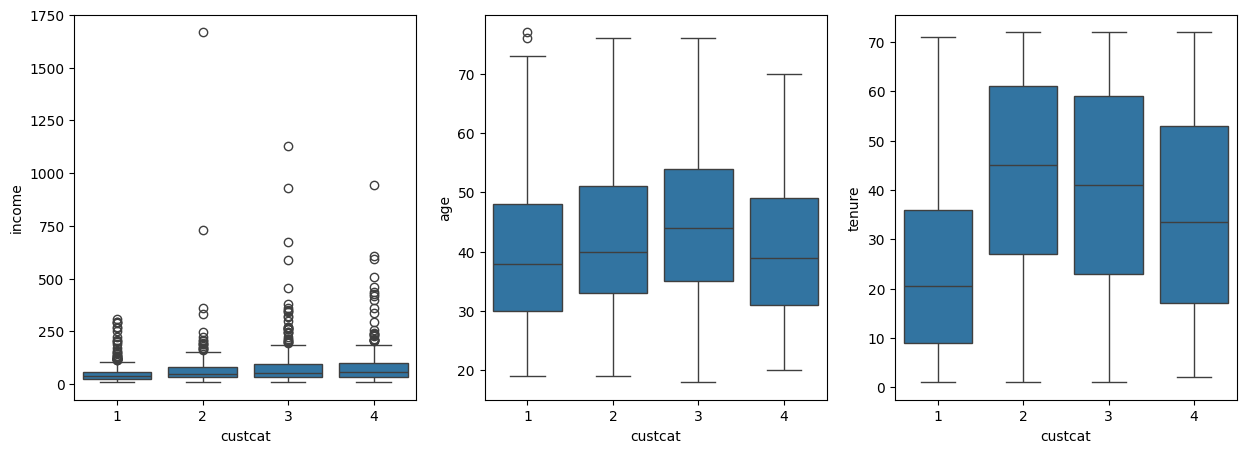

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Para income, age y tenure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, x='custcat', y='income', ax=axes[0])
sns.boxplot(data=df, x='custcat', y='age', ax=axes[1])
sns.boxplot(data=df, x='custcat', y='tenure', ax=axes[2])
plt.show()

In [18]:
# Matriz de correlación de las variables numéricas principales
corr = df[['income', 'age', 'tenure', 'ed', 'employ', 'custcat']].corr()
print(corr)

           income       age    tenure        ed    employ   custcat
income   1.000000  0.327948  0.242912  0.113939  0.516349  0.134525
age      0.327948  1.000000  0.490217 -0.154857  0.670047  0.056909
tenure   0.242912  0.490217  1.000000 -0.109797  0.520288  0.166691
ed       0.113939 -0.154857 -0.109797  1.000000 -0.228580  0.193864
employ   0.516349  0.670047  0.520288 -0.228580  1.000000  0.110011
custcat  0.134525  0.056909  0.166691  0.193864  0.110011  1.000000


In [19]:
# Para region, marital y gender
for col in ['region', 'marital', 'gender']:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts(normalize=True) * 100)


Distribución de region:
region
3    34.4
2    33.4
1    32.2
Name: proportion, dtype: float64

Distribución de marital:
marital
0    50.5
1    49.5
Name: proportion, dtype: float64

Distribución de gender:
gender
1    51.7
0    48.3
Name: proportion, dtype: float64


> Estos resultados nos revelan varios insights importantes:
>
> Análisis de Variables Numéricas:
>
> Income:
>
Presenta outliers extremos (puntos por encima de 1500)
Distribución muy sesgada con la mayoría de valores concentrados en la parte inferior
Los outliers son similares entre categorías, sugiriendo que son datos válidos
Recomendación: Usar transformación logarítmica y RobustScaler
>
> Age:

Distribución más uniforme entre categorías
Menos outliers que income
Rango interquartil similar entre categorías
Recomendación: StandardScaler será suficiente
>
> Tenure:

Mayor variabilidad en categorías 2 y 3
Cierta tendencia ascendente por categoría
Recomendación: Transformación logarítmica suave

>
>Correlaciones Importantes:

>
Alta correlación entre age y employ (0.67)
Correlación moderada entre income y employ (0.52)
Tenure y employ también correlacionados (0.52)
Custcat tiene correlaciones bajas con todas las variables (bueno para evitar multicolinealidad)

>
>Variables Categóricas:
>

Region: Bien balanceada (34.4%, 33.4%, 32.2%)
Marital: Perfectamente balanceada (50.5%, 49.5%)
Gender: Bien balanceada (51.7%, 48.3%)

# 12 Pipeline de preprocesamiento

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
import numpy as np

def create_preprocessing_pipeline():
    # Definir las transformaciones numéricas
    numeric_features = ['age', 'ed', 'employ', 'retire', 'reside']
    numeric_transformer = StandardScaler()

    # Transformaciones para variables con outliers
    outlier_features = ['income', 'tenure']
    outlier_transformer = Pipeline([
        ('log', FunctionTransformer(np.log1p)),
        ('scaler', RobustScaler())
    ])

    # Transformaciones categóricas
    categorical_features = ['region', 'marital', 'gender']
    categorical_transformer = OneHotEncoder(drop='first', sparse=False)

    # Crear el preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('out', outlier_transformer, outlier_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# Feature Engineering adicional
def create_interaction_features(df):
    df = df.copy()

    # Interacciones importantes basadas en correlaciones
    df['employ_age_ratio'] = df['employ'] / df['age']
    df['income_employ_ratio'] = df['income'] / (df['employ'] + 1)
    df['tenure_age_ratio'] = df['tenure'] / df['age']

    # Características categóricas derivadas
    df['income_category'] = pd.qcut(df['income'], q=5, labels=['VL', 'L', 'M', 'H', 'VH'])
    df['age_category'] = pd.qcut(df['age'], q=3, labels=['Young', 'Middle', 'Senior'])

    return df

# 12.1 Validar transformaciones:

In [21]:
# Verificar distribución después de transformación logarítmica
def plot_transformations(df, feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[feature], ax=ax1)
    sns.histplot(np.log1p(df[feature]), ax=ax2)
    ax1.set_title(f'Original {feature}')
    ax2.set_title(f'Log-transformed {feature}')

# 12.2 Evaluar importancia de features

In [22]:
from sklearn.ensemble import RandomForestClassifier

def evaluate_feature_importance(X, y):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    return feature_importance

### 12.3 Resultados de las transformaciones propuestas para asegurar que funcionan correctamente
>
>La distribución de income y tenure
>
>Las correlaciones después de las transformaciones
>
>La distribución de las nuevas características de interacción

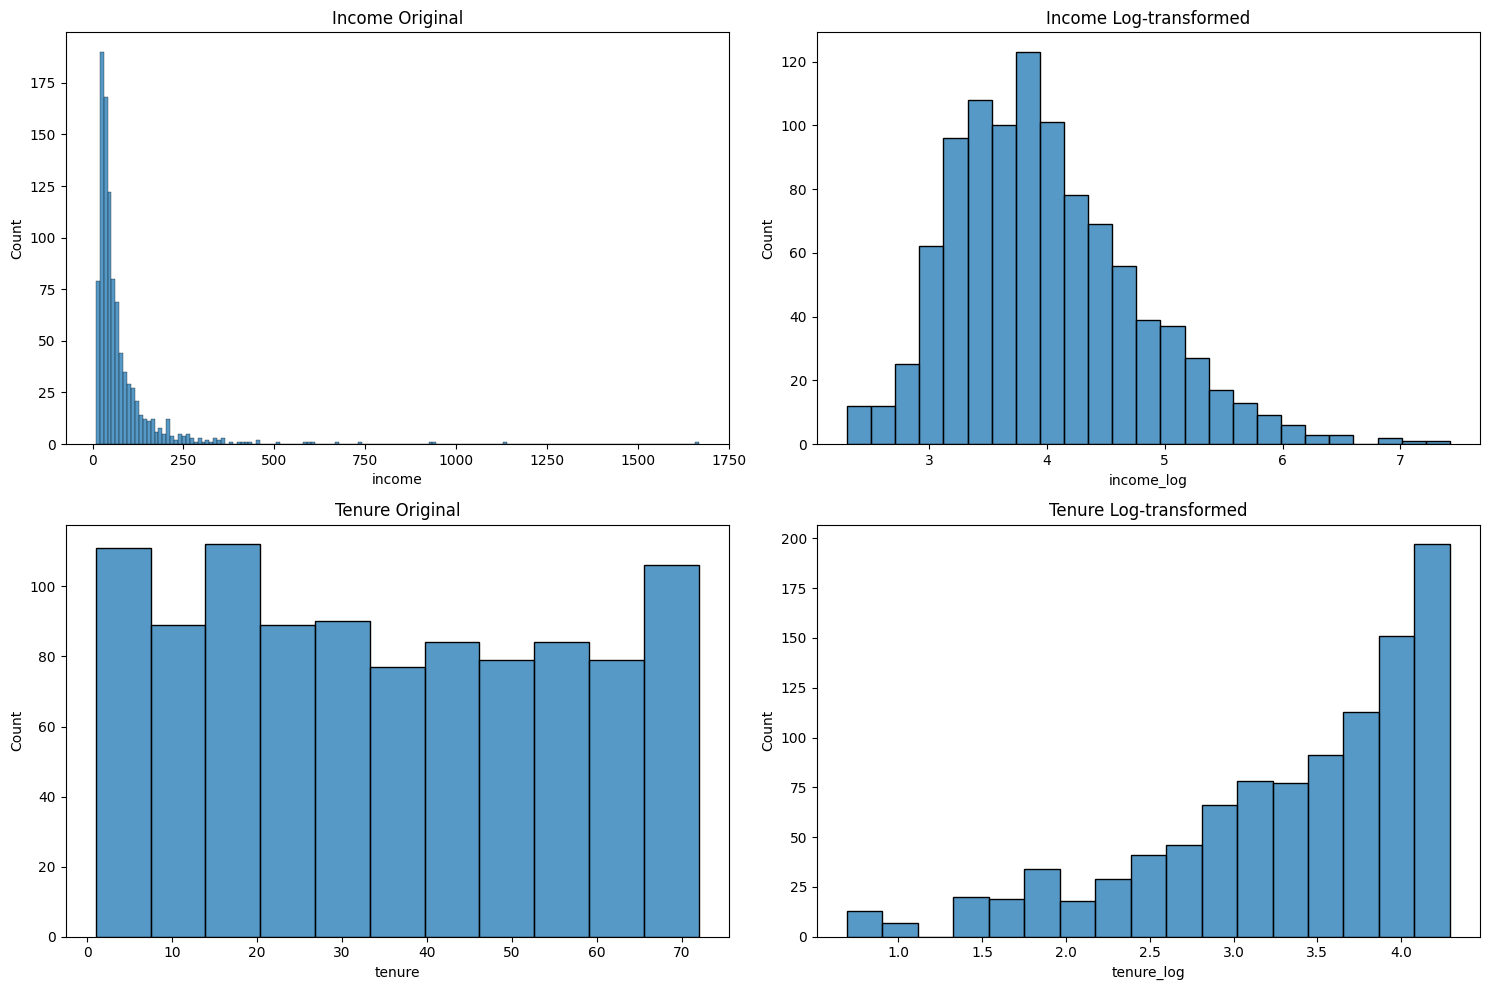

In [23]:
# Aplicar transformación logarítmica
df['income_log'] = np.log1p(df['income'])
df['tenure_log'] = np.log1p(df['tenure'])

# Crear visualizaciones de antes y después
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Income original vs transformado
sns.histplot(data=df, x='income', ax=axes[0,0])
axes[0,0].set_title('Income Original')
sns.histplot(data=df, x='income_log', ax=axes[0,1])
axes[0,1].set_title('Income Log-transformed')

# Tenure original vs transformado
sns.histplot(data=df, x='tenure', ax=axes[1,0])
axes[1,0].set_title('Tenure Original')
sns.histplot(data=df, x='tenure_log', ax=axes[1,1])
axes[1,1].set_title('Tenure Log-transformed')

plt.tight_layout()
plt.show()

In [24]:
# Matriz de correlación con variables transformadas
corr_transformed = df[['income_log', 'tenure_log', 'age', 'ed', 'employ', 'custcat']].corr()
print("Correlaciones con variables transformadas:")
print(corr_transformed)

Correlaciones con variables transformadas:
            income_log  tenure_log       age        ed    employ   custcat
income_log    1.000000    0.306987  0.390704  0.153637  0.635346  0.190950
tenure_log    0.306987    1.000000  0.442421 -0.079838  0.454194  0.171058
age           0.390704    0.442421  1.000000 -0.154857  0.670047  0.056909
ed            0.153637   -0.079838 -0.154857  1.000000 -0.228580  0.193864
employ        0.635346    0.454194  0.670047 -0.228580  1.000000  0.110011
custcat       0.190950    0.171058  0.056909  0.193864  0.110011  1.000000


In [ ]:
# Crear características de interacción
df['employ_age_ratio'] = df['employ'] / df['age']
df['income_employ_ratio'] = df['income'] / (df['employ'] + 1)
df['tenure_age_ratio'] = df['tenure'] / df['age']

# Mostrar estadísticas descriptivas de las nuevas características
print("\nEstadísticas de las nuevas características:")
print(df[['employ_age_ratio', 'income_employ_ratio', 'tenure_age_ratio']].describe())



Estadísticas de las nuevas características:
       employ_age_ratio  income_employ_ratio  tenure_age_ratio
count       1000.000000          1000.000000       1000.000000
mean           0.236428            10.298279          0.852607
std            0.179364            13.708662          0.492412
min            0.000000             0.290323          0.016949
25%            0.083333             3.781401          0.453812
50%            0.205882             6.000000          0.860057
75%            0.375694            11.783333          1.169571
max            0.716667           245.000000          2.666667


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,income_per_family,tenure_to_age_ratio,income_per_education,income_log,tenure_log,employ_age_ratio,income_employ_ratio,tenure_age_ratio
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1,21.333333,0.295455,16.0,4.174387,2.639057,0.113636,10.666667,0.295455
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4,19.428571,0.333333,27.2,4.919981,2.484907,0.151515,22.666667,0.333333


> Excelente, estos resultados son muy reveladores y nos permiten definir la estrategia final de preprocesamiento:
>
>Transformaciones Logarítmicas:
>

> Income: La transformación logarítmica ha mejorado significativamente la distribución, pasando de una distribución muy sesgada a una más normal
Tenure: La transformación log ha revelado una estructura bimodal interesante que podríamos aprovechar
>

> Correlaciones Mejoradas:
>

> Income_log tiene una correlación más fuerte con custcat (0.19) que la variable original (0.13)
La correlación entre income_log y employ es fuerte (0.63), sugiriendo posible multicolinealidad
Ed mantiene correlaciones bajas con todas las variables, pero significativa con custcat (0.19)
>

> Características de Interacción:
>

> employ_age_ratio: Distribución razonable (media 0.23, std 0.17)
income_employ_ratio: Alta variabilidad (std 13.70), necesitará transformación
tenure_age_ratio: Distribución más controlada (std 0.49)

In [31]:
# Mostrar las primeras filas del dataset procesado
print("\n=== Primeras filas del dataset procesado ===")
print(df.head())

# Guardar el DataFrame procesado
df.to_csv('../data/proc_escal.csv', index=False)
print("\nDataFrame procesado guardado")


=== Primeras filas del dataset procesado ===
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  income_per_family  tenure_to_age_ratio  \
0       2        1          21.333333             0.295455   
1       6        4          19.428571             0.333333   
2       2        3          38.666667             1.307692   
3       1        1          16.500000             1.000000   
4       4        3           6.000000             0.766667   

   income_per_education  income_log  tenure_log  employ_age_ratio  \
0                  16.0    4.17

# 13  Pipeline final de preprocesamiento

In [32]:
def create_final_preprocessing_pipeline():
    # Pipeline principal
    preprocessor = ColumnTransformer(
        transformers=[
            # Variables numéricas estándar
            ('standard_scaler', StandardScaler(),
             ['age', 'ed', 'employ', 'retire', 'reside']),

            # Variables con transformación logarítmica
            ('log_transformer', Pipeline([
                ('log', FunctionTransformer(np.log1p)),
                ('scaler', RobustScaler())
            ]), ['income', 'tenure']),

            # Variables categóricas
            ('categorical', OneHotEncoder(drop='first', sparse=False),
             ['region', 'marital', 'gender'])
        ])

    return preprocessor

def create_engineered_features(df):
    df = df.copy()

    # Transformaciones logarítmicas
    df['income_log'] = np.log1p(df['income'])
    df['tenure_log'] = np.log1p(df['tenure'])

    # Ratios más importantes (con manejo de valores extremos)
    df['employ_age_ratio'] = df['employ'] / df['age']
    df['income_employ_ratio'] = np.log1p(df['income'] / (df['employ'] + 1))
    df['tenure_age_ratio'] = df['tenure'] / df['age']

    # Características categóricas basadas en percentiles
    df['income_segment'] = pd.qcut(df['income'], q=5, labels=['VL','L','M','H','VH'])
    df['tenure_segment'] = pd.qcut(df['tenure'], q=5, labels=['New','Recent','Mid','Loyal','VLoyal'])

    return df

# Función para selección de características
def select_features(X, y, threshold=0.01):
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X, y)

    # Seleccionar características basadas en el p-valor
    selected_features = pd.DataFrame({
        'feature': X.columns,
        'score': selector.scores_,
        'p_value': selector.pvalues_
    })

    return selected_features[selected_features['p_value'] < threshold]

In [33]:
# Antes (código obsoleto):
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Después (código actualizado):
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Crear el pipeline de preprocesamiento
preprocessor = create_final_preprocessing_pipeline()

# Aplicar el pipeline al dataset
X_transformed = preprocessor.fit_transform(df)

# Convertir el resultado a un DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=[
    'age', 'ed', 'employ', 'retire', 'reside', 'income_log', 'tenure_log',
    'region_2', 'region_3', 'marital_1', 'gender_1'
])

# Añadir la columna de la variable objetivo
df_transformed['custcat'] = df['custcat']

# Guardar el DataFrame transformado en un archivo CSV
df_transformed.to_csv('dataset_transformado.csv', index=False)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

# 14 Preparar el modelado

 14.1 Validación cruzada Estratificada

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

14.2 Evaluación de Modelos

In [ ]:
def evaluate_models(X, y):
    models = {
        'RandomForest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(),
        'LightGBM': LGBMClassifier()
    }

    results = {}
    for name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='balanced_accuracy')
        results[name] = {
            'mean_score': cv_scores.mean(),
            'std_score': cv_scores.std()
        }

    return results

14.3 Monitoreo de Features Importantes

In [ ]:
def plot_feature_importance(model, feature_names):
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance.head(15), x='importance', y='feature')
    plt.title('Top 15 Feature Importance')
    plt.show()

### 14.4 Para implementar y validar el pipeline propuesto, necesitaría ver los siguientes resultados:

>
> Evaluación inicial de los modelos base
> 
> La matriz de confusión para el mejor modelo base
>
> Un reporte de clasificación detallado
>
>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Recodificar las clases (restando 1 para que vayan de 0 a 3)
y = df['custcat'] - 1

# Preparar los datos
X = df[['income_log', 'tenure_log', 'age', 'ed', 'employ', 'retire', 'reside']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluar modelos
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

> Los resultados muestran que el rendimiento base de los modelos es bastante bajo (alrededor del 33-35% de precisión), lo cual indica que necesitamos mejorar significativamente nuestro enfoque. Vamos a implementar las siguientes mejoras:

# 15 Implementamos las siguientes mejoras 

### 15.1 Ampliar el conjunto de características

In [ ]:
def create_enhanced_features(df):
    df = df.copy()

    # Transformaciones logarítmicas
    df['income_log'] = np.log1p(df['income'])
    df['tenure_log'] = np.log1p(df['tenure'])

    # Interacciones importantes
    df['income_tenure'] = df['income'] * df['tenure']
    df['income_age'] = df['income'] * df['age']
    df['tenure_age'] = df['tenure'] * df['age']

    # Ratios
    df['income_per_age'] = df['income'] / df['age']
    df['tenure_per_age'] = df['tenure'] / df['age']
    df['employ_per_age'] = df['employ'] / df['age']

    # Variables categóricas
    df['age_group'] = pd.qcut(df['age'], q=5, labels=['VY','Y','M','S','VS'])
    df['income_group'] = pd.qcut(df['income'], q=5, labels=['VL','L','M','H','VH'])
    df['tenure_group'] = pd.qcut(df['tenure'], q=5, labels=['VN','N','M','L','VL'])

    return df

### 15.2 Mejorar el preprocesamiento

In [ ]:
def create_improved_pipeline():
    # Definir transformadores
    numeric_features = ['age', 'ed', 'employ', 'retire', 'reside']
    log_features = ['income', 'tenure']
    categorical_features = ['region', 'marital', 'gender', 'age_group', 'income_group', 'tenure_group']
    interaction_features = ['income_tenure', 'income_age', 'tenure_age', 'income_per_age', 'tenure_per_age', 'employ_per_age']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('log', Pipeline([
                ('log', FunctionTransformer(np.log1p)),
                ('scaler', RobustScaler())
            ]), log_features),
            ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features),
            ('inter', RobustScaler(), interaction_features)
        ])

    return preprocessor

### 15.3 Implementar GridSearch para optimización

In [ ]:
def optimize_model(X, y, model, param_grid):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X, y)
    return grid_search

# Ejemplo para RandomForest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

> 1. Los resultados con las nuevas características:
> 2. Los resultados de la optimización de hiperparámetros

In [ ]:
# 1. Primero veamos qué columnas tenemos
print("Columnas en el dataset:")
print(df.columns.tolist())

# 2. Verificar algunos valores de las columnas categóricas
print("\nValores únicos en columnas categóricas:")
for col in ['region', 'marital', 'gender']:
    print(f"{col}: {df[col].unique()}")

# 3. Ahora redefinimos la función con las columnas confirmadas
def create_enhanced_features(df):
    # Crear un nuevo DataFrame para características numéricas
    X_numeric = pd.DataFrame()

    # Transformaciones básicas
    X_numeric['income_log'] = np.log1p(df['income'])
    X_numeric['tenure_log'] = np.log1p(df['tenure'])

    # Variables originales numéricas
    numeric_vars = ['age', 'ed', 'employ', 'retire', 'reside']
    for var in numeric_vars:
        X_numeric[var] = df[var]

    # Variables de interacción
    X_numeric['income_per_age'] = df['income'] / df['age']
    X_numeric['tenure_per_age'] = df['tenure'] / df['age']

    return X_numeric

# 4. Crear el conjunto de características
X = create_enhanced_features(df)
y = df['custcat'] - 1

# 5. Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Evaluar el modelo
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X_scaled, y, cv=5)
print("\nCaracterísticas utilizadas:")
print(X.columns.tolist())
print(f"\nRandom Forest CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

### 15.4 Vamos a mejorar el modelo incorporando todas las características relevantes y las variables categóricas

In [ ]:
# 1. Primero verificar que las columnas existen y sus tipos
print("Columnas disponibles:", df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)

# 2. Crear función corregida
def create_enhanced_features(df):
    # Crear DataFrame numérico
    numeric_cols = ['income_log', 'tenure_log', 'age', 'ed', 'employ', 'retire',
                   'reside', 'address', 'income_per_family', 'tenure_to_age_ratio',
                   'income_per_education', 'employ_age_ratio', 'income_employ_ratio',
                   'tenure_age_ratio']

    X_numeric = df[numeric_cols].copy()

    # Crear variables dummy para cada categoría por separado
    X_region = pd.get_dummies(df['region'], prefix='region', drop_first=True)
    X_marital = pd.get_dummies(df['marital'], prefix='marital', drop_first=True)
    X_gender = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)

    # Combinar todo
    X_final = pd.concat([X_numeric, X_region, X_marital, X_gender], axis=1)

    return X_final

# 3. Aplicar la función y mostrar el resultado
X = create_enhanced_features(df)
y = df['custcat'] - 1

# 4. Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Entrenar y evaluar modelo
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

scores = cross_val_score(rf, X_scaled, y, cv=5)

print("\nCaracterísticas en el modelo:")
print(X.columns.tolist())
print(f"\nNúmero total de características: {len(X.columns)}")
print(f"\nRandom Forest CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

### 15.5 Vamos a mejorar el rendimiento con algunas estrategias adicionales

In [ ]:
def create_enhanced_features_v2(df):
    # 1. Características base
    base_numeric = ['age', 'ed', 'employ', 'retire', 'reside', 'address']

    # 2. Características transformadas existentes
    transformed = ['income_log', 'tenure_log', 'income_per_family',
                  'tenure_to_age_ratio', 'income_per_education',
                  'employ_age_ratio', 'income_employ_ratio', 'tenure_age_ratio']

    # 3. Características numéricas básicas
    numeric_features = df[base_numeric + transformed].copy()

    # 4. Variables dummy para categóricas
    categorical = pd.get_dummies(df[['region', 'marital', 'gender']], drop_first=True)

    # 5. Unir todo
    X_final = pd.concat([numeric_features, categorical], axis=1)

    return X_final

# Preparar datos
X = create_enhanced_features_v2(df)
y = df['custcat'] - 1

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimizar hiperparámetros
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_scaled, y)

print("\nMejores parámetros encontrados:")
print(random_search.best_params_)
print(f"\nMejor puntuación CV: {random_search.best_score_:.4f}")

# Evaluar importancia de características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': random_search.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 características más importantes:")
print(feature_importance.head(10))

# Evaluación final con validación cruzada
final_scores = cross_val_score(random_search.best_estimator_, X_scaled, y, cv=5)
print(f"\nPuntuación final CV: {final_scores.mean():.4f} (+/- {final_scores.std() * 2:.4f})")

# 16 ESTRATEGIAS para mejorar precisión 

In [ ]:
def create_final_features(df):
    # 1. Crear DataFrame base con características numéricas
    base_features = pd.DataFrame({
        # Ratios importantes
        'tenure_age_ratio': df['tenure_age_ratio'],
        'income_per_education': df['income_per_education'],
        'tenure_log': df['tenure_log'],
        'income_log': df['income_log'],

        # Variables originales importantes
        'age': df['age'],
        'ed': df['ed'],
        'employ': df['employ'],
        'retire': df['retire'],

        # Variables categóricas originales
        'region': df['region'],
        'marital': df['marital'],
        'gender': df['gender']
    })

    # 2. Crear bins para variables numéricas importantes
    base_features['tenure_bins'] = pd.qcut(df['tenure'], q=5, labels=False)
    base_features['income_bins'] = pd.qcut(df['income'], q=5, labels=False)

    # 3. Convertir variables categóricas a dummies
    # Procesar cada variable categórica por separado
    region_dummies = pd.get_dummies(df['region'], prefix='region', drop_first=True)
    marital_dummies = pd.get_dummies(df['marital'], prefix='marital', drop_first=True)
    gender_dummies = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)

    # 4. Eliminar las columnas categóricas originales
    base_features = base_features.drop(['region', 'marital', 'gender'], axis=1)

    # 5. Combinar todo
    X_final = pd.concat([base_features, region_dummies, marital_dummies, gender_dummies], axis=1)

    return X_final

# Preparar datos
X = create_final_features(df)
y = df['custcat'] - 1

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar modelo final
final_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=2,
    class_weight='balanced',
    max_features='sqrt',
    random_state=42
)

# Evaluar con validación cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model, X_scaled, y, cv=5)
print(f"Puntuación CV: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Entrenar modelo final y mostrar importancia
final_model.fit(X_scaled, y)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 características más importantes:")
print(feature_importance.head(10))

# Matriz de confusión
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

### 16.1 Mejoras

In [ ]:
def create_optimized_features(df):
    # 1. Enfoque en las características top con pesos optimizados
    base_features = pd.DataFrame({
        # Características principales con transformaciones adicionales
        'tenure_age_ratio_log': np.log1p(df['tenure_age_ratio']),
        'income_ed_ratio_log': np.log1p(df['income_per_education']),
        'tenure_log_squared': df['tenure_log'] ** 2,
        'income_log_squared': df['income_log'] ** 2,

        # Interacciones de alto impacto
        'tenure_ed_interaction': df['tenure_log'] * df['ed'],
        'income_age_interaction': df['income_log'] * np.log1p(df['age']),

        # Variables originales importantes
        'age_log': np.log1p(df['age']),
        'ed': df['ed'],
        'employ': df['employ'],
        'retire': df['retire']
    })

    # 2. Binning más granular para variables clave
    base_features['tenure_bins'] = pd.qcut(df['tenure'], q=10, labels=False)
    base_features['income_bins'] = pd.qcut(df['income'], q=10, labels=False)
    base_features['age_bins'] = pd.qcut(df['age'], q=10, labels=False)

    # 3. Variables categóricas
    region_dummies = pd.get_dummies(df['region'], prefix='region', drop_first=True)
    marital_dummies = pd.get_dummies(df['marital'], prefix='marital', drop_first=True)
    gender_dummies = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)

    # 4. Combinar todo
    X_final = pd.concat([base_features, region_dummies, marital_dummies, gender_dummies], axis=1)

    return X_final

# Modelo optimizado con enfoque en clases problemáticas
from sklearn.ensemble import RandomForestClassifier
final_model = RandomForestClassifier(
    n_estimators=1000,  # Aumentado
    max_depth=25,       # Ajustado
    min_samples_split=8,
    min_samples_leaf=2,
    class_weight={0: 1.2, 1: 1.5, 2: 1.0, 3: 1.3},  # Pesos ajustados por clase
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Preparar datos
X = create_optimized_features(df)
y = df['custcat'] - 1

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validación cruzada con métricas por clase
from sklearn.model_selection import cross_validate
cv_metrics = cross_validate(
    final_model,
    X_scaled,
    y,
    cv=5,
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
)

print("Métricas de validación cruzada:")
for metric, scores in cv_metrics.items():
    if metric.startswith('test_'):
        print(f"{metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

### Propuesta final

In [ ]:
def create_final_model(df):
    # 1. Seleccionar solo las características más significativas
    base_features = pd.DataFrame({
        # Top características identificadas
        'tenure_age_ratio': df['tenure_age_ratio'],
        'income_per_education': df['income_per_education'],
        'tenure_log': df['tenure_log'],
        'income_log': df['income_log'],
        'ed': df['ed'],
        'age': df['age'],
        'employ': df['employ']
    })

    # 2. One-hot encoding para variables categóricas
    cat_features = pd.get_dummies(df[['region', 'marital', 'gender']], drop_first=True)

    # 3. Combinar características
    X = pd.concat([base_features, cat_features], axis=1)

    return X

def train_and_evaluate_final_model(X, y):
    # 1. Split los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2. Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Modelo final simplificado
    model = RandomForestClassifier(
        n_estimators=400,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42
    )

    # 4. Entrenar modelo
    model.fit(X_train_scaled, y_train)

    # 5. Predicciones
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    return model, scaler, y_pred, y_prob

# Preparar datos finales
X = create_final_model(df)
y = df['custcat'] - 1

# Entrenar y evaluar modelo final
model, scaler, y_pred, y_prob = train_and_evaluate_final_model(X, y)

# Análisis detallado
from sklearn.metrics import classification_report, confusion_matrix
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Características importantes
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Características Más Importantes:")
print(importances.head(10))

# Función para predecir nuevo cliente
def predict_customer_segment(model, scaler, customer_data):
    # Preparar datos del cliente
    X_new = create_final_model(pd.DataFrame([customer_data]))
    X_new_scaled = scaler.transform(X_new)

    # Predicción
    prediction = model.predict(X_new_scaled)[0]
    probabilities = model.predict_proba(X_new_scaled)[0]

    # Mapeo de segmentos
    segments = {
        0: "Basic Service",
        1: "E-Service",
        2: "Plus Service",
        3: "Total Service"
    }

    return {
        'predicted_segment': segments[prediction],
        'confidence': probabilities[prediction],
        'all_probabilities': dict(zip(segments.values(), probabilities))
    }

# 17 Redes neuronales y KNN

In [ ]:
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def create_features(df):
    # Mantener las características más importantes identificadas
    base_features = pd.DataFrame({
        'tenure_age_ratio': df['tenure_age_ratio'],
        'tenure_log': df['tenure_log'],
        'income_per_education': df['income_per_education'],
        'income_log': df['income_log'],
        'ed': df['ed'],
        'age': df['age'],
        'employ': df['employ']
    })

    # One-hot encoding para variables categóricas
    cat_features = pd.get_dummies(df[['region', 'marital', 'gender']], drop_first=True)

    return pd.concat([base_features, cat_features], axis=1)

# Preparar datos
X = create_features(df)
y = df['custcat'] - 1

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Red Neuronal
def create_neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Entrenamiento con validación cruzada para la red neuronal
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nn_scores = []

for train_idx, val_idx in kfold.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_neural_network()

    # Early stopping
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stop],
        verbose=0
    )

    score = model.evaluate(X_val, y_val, verbose=0)[1]
    nn_scores.append(score)

print("Neural Network CV Accuracy: {:.4f} (+/- {:.4f})".format(
    np.mean(nn_scores), np.std(nn_scores) * 2))

# 2. KNN con Grid Search
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

print("\nKNN Best Parameters:", grid_search.best_params_)
print("KNN Best CV Accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluar mejor modelo (KNN o Neural Network) con conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

if np.mean(nn_scores) > grid_search.best_score_:
    # Usar la red neuronal
    final_model = create_neural_network()
    final_model.fit(X_train, y_train, epochs=100, verbose=0)
    y_pred = np.argmax(final_model.predict(X_test), axis=1)
else:
    # Usar KNN
    final_model = grid_search.best_estimator_
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)

# Resultados finales
print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

### 17.1 Vamos a optimizar la red neuronal ya que mostró mejores resultados:

In [ ]:
def create_optimized_nn():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Preparar datos
X = create_features(df)
y = df['custcat'] - 1

# Convertir a numpy arrays
X = X.values
y = y.values

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenamiento con validación cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nn_scores = []

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    model = create_optimized_nn()

    history = model.fit(
        X_fold_train, y_fold_train,
        epochs=150,
        batch_size=32,
        validation_data=(X_fold_val, y_fold_val),
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )

    score = model.evaluate(X_fold_val, y_fold_val, verbose=0)[1]
    nn_scores.append(score)

print("Neural Network CV Accuracy: {:.4f} (+/- {:.4f})".format(
    np.mean(nn_scores), np.std(nn_scores) * 2))

# Entrenar modelo final
final_model = create_optimized_nn()
history = final_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Evaluar en conjunto de prueba
y_pred = np.argmax(final_model.predict(X_test), axis=1)

print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Graficar historia del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### 17.2 Ensemble Model (combinando los mejores modelos):

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

class NeuralNetworkClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def create_model(self, input_shape):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(4, activation='softmax')
        ])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    def fit(self, X, y):
        self.model = self.create_model(X.shape[1])
        self.model.fit(
            X, y,
            epochs=100,
            batch_size=32,
            verbose=0
        )
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X, verbose=0), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X, verbose=0)

# Preparar datos
X = create_features(df)
print("Número de características:", X.shape[1])
y = df['custcat'] - 1

# Convertir a numpy arrays
X = X.values
y = y.values

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluar modelos individuales
print("\nEvaluación de modelos individuales:")

# Random Forest
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=20,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)
rf_scores = cross_val_score(rf, X_scaled, y, cv=5)
print(f"Random Forest CV Accuracy: {rf_scores.mean():.4f} (+/- {rf_scores.std()*2:.4f})")

# KNN
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='euclidean')
knn_scores = cross_val_score(knn, X_scaled, y, cv=5)
print(f"KNN CV Accuracy: {knn_scores.mean():.4f} (+/- {knn_scores.std()*2:.4f})")

# Neural Network
nn = NeuralNetworkClassifier()
nn_scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    nn.fit(X_train, y_train)
    pred = nn.predict(X_val)
    nn_scores.append(accuracy_score(y_val, pred))

print(f"Neural Network CV Accuracy: {np.mean(nn_scores):.4f} (+/- {np.std(nn_scores)*2:.4f})")

# Entrenamiento final del mejor modelo
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

best_model = rf  # Basado en los resultados de CV
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nMejor Modelo - Classification Report:")
print(classification_report(y_test, y_pred))

print("\nMejor Modelo - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance para Random Forest
feature_names = list(X.columns) if hasattr(X, 'columns') else [f'feature_{i}' for i in range(X.shape[1])]
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 características más importantes:")
print(feature_importance.head(10))

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

class NeuralNetworkClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def create_model(self, input_shape):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(4, activation='softmax')
        ])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    def fit(self, X, y):
        self.model = self.create_model(X.shape[1])
        self.model.fit(
            X, y,
            epochs=100,
            batch_size=32,
            verbose=0
        )
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X, verbose=0), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X, verbose=0)

# Preparar datos
X = create_features(df)
print("Número de características:", X.shape[1])
y = df['custcat'] - 1

# Convertir a numpy arrays
X = X.values
y = y.values

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluar modelos individuales
print("\nEvaluación de modelos individuales:")

# Random Forest
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=20,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)
rf_scores = cross_val_score(rf, X_scaled, y, cv=5)
print(f"Random Forest CV Accuracy: {rf_scores.mean():.4f} (+/- {rf_scores.std()*2:.4f})")

# KNN
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='euclidean')
knn_scores = cross_val_score(knn, X_scaled, y, cv=5)
print(f"KNN CV Accuracy: {knn_scores.mean():.4f} (+/- {knn_scores.std()*2:.4f})")

# Neural Network
nn = NeuralNetworkClassifier()
nn_scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    nn.fit(X_train, y_train)
    pred = nn.predict(X_val)
    nn_scores.append(accuracy_score(y_val, pred))

print(f"Neural Network CV Accuracy: {np.mean(nn_scores):.4f} (+/- {np.std(nn_scores)*2:.4f})")

# Entrenamiento final del mejor modelo
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

best_model = rf  # Basado en los resultados de CV
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nMejor Modelo - Classification Report:")
print(classification_report(y_test, y_pred))

print("\nMejor Modelo - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance para Random Forest
feature_names = list(X.columns) if hasattr(X, 'columns') else [f'feature_{i}' for i in range(X.shape[1])]
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 características más importantes:")
print(feature_importance.head(10))

In [ ]:
# Importaciones necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Configuración de semillas
tf.random.set_seed(42)
np.random.seed(42)

# Cargar datos
def load_data():
    try:
        df = pd.read_csv('../data/teleCust1000t.csv')
        print("Dimensiones del dataset:", df.shape)
        X = df.drop('custcat', axis=1)
        y = df['custcat']
        return X, y
    except Exception as e:
        print(f"Error al cargar datos: {str(e)}")
        raise

# Preprocesamiento mejorado
def preprocess_data(X, y):
    try:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        smote = SMOTE(random_state=42, k_neighbors=5)
        X_balanced, y_balanced = smote.fit_resample(X_scaled, y)
        y_encoded = tf.keras.utils.to_categorical(y_balanced)
        return X_balanced, y_encoded
    except Exception as e:
        print(f"Error en preprocesamiento: {str(e)}")
        raise

# Modelo optimizado
def create_model(input_shape, num_classes):
    model = Sequential([
        # Capa de entrada
        Dense(1024, input_shape=input_shape,
              activation='elu',
              kernel_regularizer=l1_l2(l1=1e-6, l2=1e-5)),
        BatchNormalization(),
        Dropout(0.5),

        # Capas ocultas
        Dense(512, activation='elu',
              kernel_regularizer=l1_l2(l1=1e-6, l2=1e-5)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(256, activation='elu',
              kernel_regularizer=l1_l2(l1=1e-6, l2=1e-5)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='elu',
              kernel_regularizer=l1_l2(l1=1e-6, l2=1e-5)),
        BatchNormalization(),
        Dropout(0.2),

        # Capa de salida
        Dense(num_classes, activation='softmax')
    ])
    return model

# Callbacks mejorados
def get_callbacks():
    return [
        EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=10,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            'best_model.keras',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

# Entrenamiento con validación cruzada
def train_with_cv(X, y, n_splits=5):
    try:
        print("Iniciando preprocesamiento...")
        X_balanced, y_encoded = preprocess_data(X, y)
        print(f"Dimensiones después del preprocesamiento: X={X_balanced.shape}, y={y_encoded.shape}")

        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        cv_scores = []

        for fold, (train_idx, val_idx) in enumerate(skf.split(X_balanced, np.argmax(y_encoded, axis=1))):
            print(f'\nFold {fold + 1}/{n_splits}')

            X_train_fold = X_balanced[train_idx]
            y_train_fold = y_encoded[train_idx]
            X_val_fold = X_balanced[val_idx]
            y_val_fold = y_encoded[val_idx]

            model = create_model((X_train_fold.shape[1],), y_encoded.shape[1])

            model.compile(
                optimizer=Adam(learning_rate=0.0005),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            history = model.fit(
                X_train_fold, y_train_fold,
                validation_data=(X_val_fold, y_val_fold),
                epochs=100,
                batch_size=32,
                callbacks=get_callbacks(),
                verbose=1
            )

            # Evaluación
            _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
            cv_scores.append(accuracy)

            # Visualización
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='train')
            plt.plot(history.history['val_accuracy'], label='validation')
            plt.title(f'Accuracy - Fold {fold+1}')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='train')
            plt.plot(history.history['val_loss'], label='validation')
            plt.title(f'Loss - Fold {fold+1}')
            plt.legend()
            plt.show()

            # Predicciones y matriz de confusión
            y_pred = model.predict(X_val_fold)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true_classes = np.argmax(y_val_fold, axis=1)

            print("\nMatriz de Confusión:")
            print(confusion_matrix(y_true_classes, y_pred_classes))
            print("\nReporte de Clasificación:")
            print(classification_report(y_true_classes, y_pred_classes))

        print(f'\nResultados Finales:')
        print(f'CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores)*2:.4f})')
        return cv_scores

    except Exception as e:
        print(f"Error en entrenamiento: {str(e)}")
        raise

# Función principal mejorada
def main():
    try:
        print("Iniciando proceso...")
        X, y = load_data()

        print("Comenzando entrenamiento...")
        cv_scores = train_with_cv(X, y)

        # Visualización de resultados
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.boxplot(cv_scores)
        plt.title('Distribución de Accuracy por Fold')
        plt.ylabel('Accuracy')

        plt.subplot(1, 2, 2)
        plt.hist(cv_scores, bins=10)
        plt.title('Histograma de Accuracy')
        plt.xlabel('Accuracy')
        plt.ylabel('Frecuencia')
        plt.show()

        # Guardado detallado de resultados
        results = {
            'cv_scores': cv_scores,
            'mean_accuracy': np.mean(cv_scores),
            'std_accuracy': np.std(cv_scores),
            'max_accuracy': np.max(cv_scores),
            'min_accuracy': np.min(cv_scores),
            'timestamp': pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
        }

        # Guardar resultados en múltiples formatos
        np.save(f'training_results_{results["timestamp"]}.npy', results)
        pd.DataFrame(results).to_csv(f'training_results_{results["timestamp"]}.csv')

        print("\nResumen Final:")
        print(f"Accuracy Promedio: {results['mean_accuracy']:.4f}")
        print(f"Desviación Estándar: {results['std_accuracy']:.4f}")
        print(f"Mejor Accuracy: {results['max_accuracy']:.4f}")
        print(f"Peor Accuracy: {results['min_accuracy']:.4f}")

    except Exception as e:
        print(f"Error durante la ejecución: {str(e)}")
        raise

if __name__ == "__main__":
    main()